In [ ]:
#Análisis Operacional - M/M/1 & M/M/S
#M/M/1:
#M indica que las llegadas siguen un proceso de Poisson.
#M indica que el tiempo de servicio sigue una distribución exponencial.
#1 indica que hay un solo servidor.(Solo hay una caja Abierta)
#M/M/S:SSSS
#imilar al M/M/1, pero S indica que hay S servidores disponibles.

In [ ]:
from math import factorial

# Funciones para el modelo M/M/1
def mm1_avg_customers(lam, mu):
    rho = lam / mu
    ls = rho / (1 - rho)
    return ls

def mm1_total_time(lam, mu):
    ws = 1 / (mu - lam)
    return ws

def mm1_system_utilization(lam, mu):
    rho = lam / mu
    return rho

def mm1_avg_waiting_customers(lam, mu):
    lq = lam ** 2 / (mu * (mu - lam))
    return lq

def mm1_empty_system_probability(lam, mu):
    p0 = 1 - lam / mu
    return p0

def mm1_probability_n_customers(lam, mu, n):
    rho = lam / mu
    pn = (1 - rho) * (rho ** n)
    return pn

# Funciones para el modelo M/M/S
def mms_avg_customers(lam, mu, s):
    rho = lam / (s * mu)
    numerador = rho ** s * (1 - rho)
    denominador = factorial(s) * (1 - rho)
    ls = numerador / denominador
    return ls

def mms_avg_time(lam, mu, s):
    ls = mms_avg_customers(lam, mu, s)
    ws = ls / lam
    return ws

def mms_avg_waiting_customers(lam, mu, s):
    lq = mms_avg_customers(lam, mu, s) - lam / mu
    return lq

def mms_empty_system_probability(lam, mu, s):
    rho = lam / (s * mu)
    p0_denom = sum([(rho ** n) / factorial(n) for n in range(s)])
    p0 = 1 / (1 + ((rho ** s) / factorial(s)) * p0_denom)
    return p0

def mms_probability_n_customers(lam, mu, s, n):
    rho = lam / (s * mu)
    if n < s:
        pn = (rho ** n) / factorial(n)
    else:
        pn = (rho ** n) / (factorial(s) * (s ** (n - s)))
    return pn

# Función para solicitar al usuario que ingrese valores
def get_user_input():
    lam = float(input("Ingrese la tasa de llegada (λ): "))
    mu = float(input("Ingrese la tasa de servicio (µ): "))
    s = int(input("Ingrese el número de servidores (s): "))
    return lam, mu, s

# Función principal del programa
def main():
    print("Seleccione el modelo:")
    print("1. M/M/1")
    print("2. M/M/S")
    model_choice = int(input("Ingrese el número del modelo que desea utilizar: "))

    if model_choice == 1:
        lam, mu, _ = get_user_input()
        print("Seleccione la métrica a calcular:")
        print("1. Número promedio de clientes en el sistema")
        print("2. Tiempo total en el sistema")
        print("3. Utilización del sistema")
        print("4. Número promedio de clientes en la fila")
        print("5. Probabilidad de sistema vacío")
        print("6. Probabilidad de n clientes en el sistema")
        metric_choice = int(input("Ingrese el número de la métrica que desea calcular: "))

        if metric_choice == 1:
            result = mm1_avg_customers(lam, mu)
        elif metric_choice == 2:
            result = mm1_total_time(lam, mu)
        elif metric_choice == 3:
            result = mm1_system_utilization(lam, mu)
        elif metric_choice == 4:
            result = mm1_avg_waiting_customers(lam, mu)
        elif metric_choice == 5:
            result = mm1_empty_system_probability(lam, mu)
        elif metric_choice == 6:
            n = int(input("Ingrese el número de clientes (n): "))
            result = mm1_probability_n_customers(lam, mu, n)
        else:
            print("Opción no válida")

        print(f"Resultado: {result}")

    elif model_choice == 2:
        lam, mu, s = get_user_input()
        print("Seleccione la métrica a calcular:")
        print("1. Número promedio de clientes en el sistema")
        print("2. Tiempo promedio en el sistema")
        print("3. Número promedio de clientes en la fila")
        print("4. Probabilidad de sistema vacío")
        print("5. Probabilidad de n clientes en el sistema")
        metric_choice = int(input("Ingrese el número de la métrica que desea calcular: "))

        if metric_choice == 1:
            result = mms_avg_customers(lam, mu, s)
        elif metric_choice == 2:
            result = mms_avg_time(lam, mu, s)
        elif metric_choice == 3:
            result = mms_avg_waiting_customers(lam, mu, s)
        elif metric_choice == 4:
            result = mms_empty_system_probability(lam, mu, s)
        elif metric_choice == 5:
            n = int(input("Ingrese el número de clientes (n): "))
            result = mms_probability_n_customers(lam, mu, s, n)
        else:
            print("Opción no válida")

        print(f"Resultado: {result}")

    else:
        print("Opción no válida")

if __name__ == "__main__":
    main()


Seleccione el modelo:
1. M/M/1
2. M/M/S


In [ ]:
#"Estamos monitoriando cómo los clientes se mueven entre diferentes áreas del cine como: 
#"Entrada","Boletería" y "Sala de Proyección". 
#se Registran cada vez que un cliente se desplaza de una área a otra,generando una secuencia de estados como;
#"Entrada", "Boletería", "Sala de Proyección", "Boletería", "Sala de Proyección", "Sala de Proyección", etc.
#Entonces aplicamos este proceso a una cadena de Markov:

#Mapeo de Estados: 
#1. Asignas números a las áreas del cine, por ejemplo, "Entrada"=0.5, "Boletería"=0.25, "Sala de Proyección"=0.25.
#Conteo de Transiciones: 
#2. Contamos cuántas veces un cliente se mueve de un área a otra. 
#Por ejemplo, si hay 3 transiciones de "Entrada" a "Boletería", anotamos ese número.
#3 Probabilidades: se calcula las probabilidades de transición. 
#Si hay 3 transiciones de "Entrada" a "Boletería" y un total de 5 movimientos desde "Entrada", la probabilidad es 3/5.
#Estado Inicial: El último lugar que el cliente visita en tu observación se convierte en el estado inicial para la cadena de Markov. 
#Si la última transición registrada fue de "Sala de Proyección", entonces "Sala de Proyección" sería tu estado inicial.

#Este proceso ayuda a entender cómo los clientes se desplazan dentro del cine y proporciona información para prever futuros movimientos, 
#lo que podría ser útil para optimizar la distribución de servicios y reducir las colas."
#Primera Fila: 0.4 0.3 0.3
#Segunda Fila: 0.2 0.5 0.3
#Tercera Fila: 0.4 0.3 0.3
#estado inicial: 2

Ingrese la matriz de probabilidad de transición (por filas):
Fila 1: 0.4 0.3 0.3 
Fila 2: 0.2 0.5 0.3
Fila 3: 0.4 0.3 0.3
Ingrese el estado inicial (1, 2 o 3): 2

Matriz de probabilidad de transición:
[[0.4 0.3 0.3]
 [0.2 0.5 0.3]
 [0.4 0.3 0.3]]


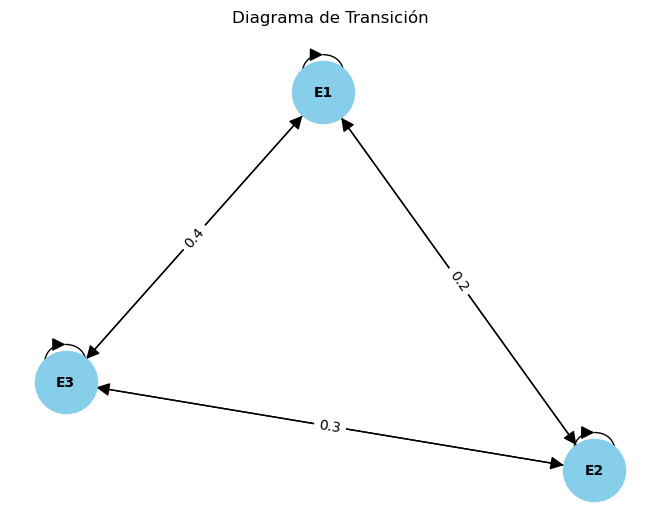


Vector de estado inicial:
E2 -> 1, Resto -> 0

Vector para el periodo 2:
[0. 0. 1.]


In [47]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def matriz_transicion():
    print("Ingrese la matriz de probabilidad de transición (por filas):")
    P = []
    try:
        for i in range(3):
            fila = list(map(float, input(f"Fila {i + 1}: ").split()))
            # Verifica que la fila tenga la misma longitud
            if len(fila) != 3:
                raise ValueError("La fila debe tener 3 elementos.")
            # Verifica que las probabilidades sumen 1
            if not np.isclose(np.sum(fila), 1):
                raise ValueError("Las probabilidades en la fila deben sumar 1.")
            P.append(fila)
    except ValueError as e:
        print(f"Error: {e}")
        return matriz_transicion()
    return np.array(P)

def simular_cadena_markov(P, estado_inicial, periodos):
    estados = [estado_inicial]
    for _ in range(periodos):
        nuevo_estado = np.random.choice(range(len(P)), p=P[estados[-1]])
        estados.append(nuevo_estado)
    return estados

def mostrar_resultados(P, estado_inicial, periodos):
    # Mostrar matriz de probabilidad de transición
    print("\nMatriz de probabilidad de transición:")
    print(P)

    # Crear y mostrar diagrama de transición
    G = nx.DiGraph()
    for i in range(len(P)):
        for j in range(len(P[i])):
            if P[i, j] > 0:
                G.add_edge(f'E{i+1}', f'E{j+1}', weight=P[i, j])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Diagrama de Transición")
    plt.show()

    # Mostrar vector de estado inicial
    print("\nVector de estado inicial:")
    print(f"E{estado_inicial + 1} -> 1, Resto -> 0")

    # Calcular y mostrar vector para el periodo 2
    resultados_simulacion = simular_cadena_markov(P, estado_inicial, periodos)
    vector_periodo_2 = np.zeros(len(P))
    vector_periodo_2[resultados_simulacion[1]] = 1
    print("\nVector para el periodo 2:")
    print(vector_periodo_2)

def main():
    # Configuración inicial
    P = matriz_transicion()
    estado_inicial = int(input("Ingrese el estado inicial (1, 2 o 3): ")) - 1  # Ajusta el índice del estado inicial
    periodos = 2  # Siempre calcularemos el vector para el periodo 2

    # Mostrar resultados
    mostrar_resultados(P, estado_inicial, periodos)

if __name__ == "__main__":
    main()
